In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# define f
def f(x):
    k = len(x)
    return 0.5 * np.sum(x * (x - 1)) + 0.5 * k * (k - 1)

def generate_pre_cluster_sets(n, k, alpha_param):
    # generate Dirichlet parameters for this k
    alpha = np.full(k, alpha_param)

    # sample probabilities from Dirichlet distribution
    probabilities = np.random.dirichlet(alpha)

    # sample x_i values from multinomial distribution
    x = np.random.multinomial(n, probabilities)

    return x

def evaluate_f_avg(n, k_range, k_iterations, alpha_param):
    f_avg_values = []

    # Step 1 -> sampling and evaluation
    for i, k in enumerate(range(k_range[0], k_range[1] + 1)):

        f_values = []

        for _ in range(k_iterations):
            x = generate_pre_cluster_sets(n, k, alpha_param)
            f_values.append(f(x))

        f_avg = np.mean(f_values)
        f_avg_values.append((k, f_avg))
        
    
    # Step 2 -> finding k that minimizes f_avg
    f_avg_values.sort(key=lambda x: x[1])  # Sort by f_avg in ascending order
    best_k_values = [x[0] for x in f_avg_values[:10]] # take top 10

    return best_k_values, f_avg_values

def run_simulations(n, n_iterations, k_iterations, k_range, alpha_param):
    optimal_k_values = []
    in_interval_counts = 0

    # run simulations and record optimal k values
    for i in range(n_iterations):
        best_k_values, _ = evaluate_f_avg(n, k_range, k_iterations, alpha_param)
        optimal_k_values.extend(best_k_values)

        for value in best_k_values:
            if value in range(interval[0], interval[1] + 1):
                in_interval_counts += 1

    # compute statistics
    mean_val = np.mean(optimal_k_values)
    
    return mean_val
        

def run_and_plot_distributions(n, n_iterations, k_iterations, k_range, alphas, labels):
    plt.figure(figsize=(12, 8))
    
    for alpha, label in zip(alphas, labels):
        # collect all optimal k values for a given alpha across all iterations
        all_optimal_k_values = []
        
        for _ in range(n_iterations):
            best_k_values, _ = evaluate_f_avg(n, k_range, k_iterations, alpha)
            all_optimal_k_values.extend(best_k_values)
            
        # plotting the KDE (estimate of PDF)
        sns.kdeplot(all_optimal_k_values, label=label, lw=2.5)

        
    # setting labels, title, legend, etc.
    
    plt.xlabel('Near-Optimal k', fontsize=16)
    plt.ylabel('Probability Density', fontsize=16)
    plt.axvline(x=interval[0], color='r', linestyle='--', linewidth=2.5)
    plt.axvline(x=interval[1], color='r', linestyle='--', linewidth=2.5)
    plt.legend(loc='upper right', fontsize=18)
    sns.set(style='darkgrid')
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.tight_layout()
    plt.xlim(200, 650)
    #plt.savefig('probability_densities.png', dpi=300, facecolor='white') 
    plt.show()

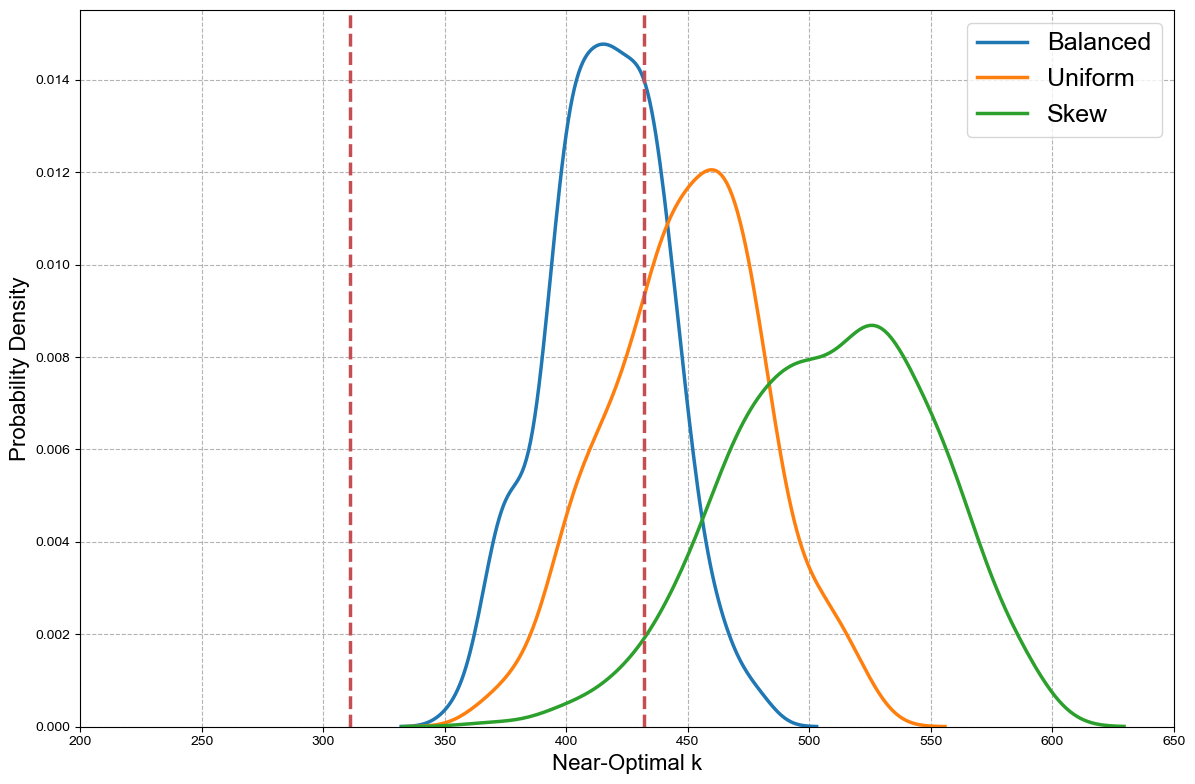

In [2]:
# Parameters
n = 10000
n_iterations = 40
k_iterations = 2
k_range = (300, 600)
alphas = [2, 1, 0.5]
labels = ['Balanced', 'Uniform', 'Skew']

# define interval
lower_coefficients = np.array([0.59152719,  0.68053571])
upper_coefficients = np.array([1.05171082, 0.6534756])
lower_bound = lower_coefficients[0] * n ** lower_coefficients[1]
upper_bound = upper_coefficients[0] * n ** upper_coefficients[1]
interval = (int(lower_bound), int(upper_bound))

# Run the simulations and plot
run_and_plot_distributions(n, n_iterations, k_iterations, k_range, alphas, labels)